## Homework 1 
### DUE: Thursday Jan 30

**The semi-empirical mass formula**

In nuclear physics, the semi-empirical mass formula is a formula for calculating the
approximate nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$
and mass number $A$. The formula looks like this:
    
$$ B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A - 2Z)^2}{A} - \frac{a_5}{A^{1/2}} $$

where, in units of millions of electron volts (MeV), the constants are $a_1 =
15.67$, $a_2 = 17.23$, $a_3 = 0.75$, $a_4 = 93.2$, and

$$ a_5  \; =  \;\; \left\{ \begin{array} {r@{\quad\tt if \quad}l} 0 & A \;{\tt is
      \; odd}, \\
    12.0 & A \;{\tt and}\; Z \;{\tt are \;both \;even}, \\ -12.0 & A \;{\tt is
     \;  even \; and}\;  Z \;{\tt is
  \;  odd.} \end{array} \right. $$

Write a **function** that takes as its input the values of $A$ and $Z$, and
prints out the binding energy $B$ for the corresponding atom 

Use your program to find
the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The
correct answer is around 490 MeV.) 

(20 points)

In [2]:
# code 

#A = input("input A value")

#Z = input("input Z value")


def binding_energy(A,Z):
    a = 15.67
    b = 17.23
    c = 0.75
    d = 93.2
        
    if A % 2 != 0:
        e = 0
    if A % 2 == 0 and Z % 2 == 0:
        e = 12.0
    if A % 2 == 0 and Z % 2 != 0:
        e = -12.0 
    
    B = (a*A)-(b*(A**(2/3)))-(c*((Z**2)/(A**(1/3))))-(d*(((A-(2*Z))**2)/A))-(e/(A**(1/2)))
    return B

print("The binding energy is",binding_energy(58,28))

The binding energy is 490.78425241273493


Now create a new function that calculates the binding energy per nucleon, B/A. You should be able to write a very short function that calls your previous function to do the heavy lifting. Test your function with some famous cases, e.g., iron 56 and carbon 12.

(10 points)

In [3]:
# code
def B_E_per_nucleon(A,Z):
    
    C = binding_energy(A,Z)/A
    return C

print("The binding energy per nucleon is", B_E_per_nucleon(92,56)) #Iron-56 w/ A=92, Z=56


The binding energy per nucleon is 1.7720617636286498


Create yet another function that takes a single argument, Z, and finds the value of A at which the binding energy per nucleon is largest. You are aided in this problem in the fact that A is discrete; you can simply check all reasonable values without worrying about mimizing a function or any such thing. You should be able to easily determine the minimum value for A. If you consult a table of nuclides, you'll see some elements have nuclides, with measured half lives, with A > 2Z, so in this exercise use A = 3Z as an upper limit. I encourage you to go verify this! At the time of writing wikipedia has a high resolution version https://upload.wikimedia.org/wikipedia/commons/9/92/NuclideMap.PNG

(20 points)

In [20]:
# code take in number of protons, Z, finds the atomic mass, A, at which B.E. per nucleon (found w/ function B_E_per_nucleon) is largest

#starting with the same code I have above:

def binding_energy(A, Z):
    a = 15.67
    b = 17.23
    c = 0.75
    d = 93.2

    if A % 2 != 0:
        e = 0
    if A % 2 == 0 and Z % 2 == 0:
        e = 12.0
    if A % 2 == 0 and Z % 2 != 0:
        e = -12.0 

    B = (a*A)-(b*(A**(2/3)))-(c*((Z**2)/(A**(1/3))))-(d*(((A-(2*Z))**2)/A))-(e/(A**(1/2)))
    return B

#same as above:
def B_E_per_nucleon(A, Z):
    C = binding_energy(A, Z) / A
    return C

#new function to find A where BE per nucleon is max 
def A_for_BE_max(Z):
    max_result = (-float("inf"), Z)  #first element is the lowest possible number, second element is Z
    for A in range(Z, 3 * Z + 1):    #looping from Z, the lowest possible value, to 3Z+1 which will actually return 3Z, the upper limit
        be_per_a = B_E_per_nucleon(A, Z)
        if be_per_a > max_result[0]:
            max_result = (be_per_a, A)
    return max_result[1], max_result[0]


# Example calculation for Z = 8 (Oxygen)
optimal_A, max_BE_per_A = optimal_A_for_max_BE_per_nucleon(8)
print("BE/A is maximized at", (max_BE_per_A), "MeV,", "where A is", (optimal_A))



BE/A is maximized at 7.548468092448104 MeV, where A is 17


Finally, create a plot of the highest binding energy per nucleon as a function of Z. Remember: science quality plots have labeled axes and a title.

(10 points)

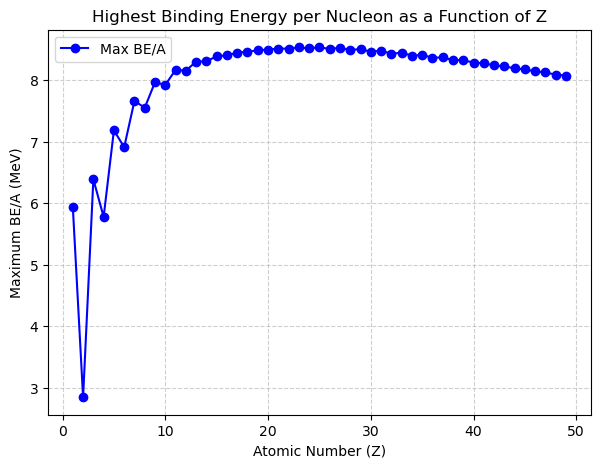

In [32]:
# code

import matplotlib.pyplot as plt

# Generate data for the plot
Z_values = (range(1, 50, 1))  # 50 points should be plenty to show the trend
max_BE_per_A_values = [A_for_BE_max(Z)[1] for Z in Z_values]

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(Z_values, max_BE_per_A_values, marker='o', linestyle='-', color='b', label='Max BE/A')
plt.title("Highest Binding Energy per Nucleon as a Function of Z")
plt.xlabel("Atomic Number (Z)")
plt.ylabel("Maximum BE/A (MeV)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

**Least Squares fitting**

It's a common situation in physics that an experiment produces data
that lies roughly on a straight line. The straight line can be represented in the familiar form $y=mx+c$ and a
frequent question is what the appropriate values of the slope $m$ and
intercept $c$ are that correspond to the measured data.  Since the data
don't fall perfectly on a straight line, there is no perfect answer to such
a question, but we can find the straight line that gives the best
compromise fit to the data.  The standard technique for doing this is the
*method of least squares*.

Suppose we make some guess about the parameters $m$ and $c$ for the
straight line.  We then calculate the vertical distances between the data
points and that line, as represented by the short vertical lines in the
figure, then we calculate the sum of the squares of those distances, which
we denote $\chi^2$.  If we have $N$ data points with
coordinates $(x_i,y_i)$, then $\chi^2$ is given by

$$\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.$$

The least-squares fit of the straight line to the data is the straight line
that minimizes this total squared distance from data to line.  We find the
minimum by differentiating with respect to both $m$ and $c$ and setting the
derivatives to zero, which gives

$$m \sum_{i=1}^N x_i^2 + c \sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i = 0, $$
$$m \sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i = 0.$$

For convenience, let us define the following quantities:

$$E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i $$

in terms of which our equations can be written

$$mE_{xx} + cE_x = E_{xy}, $$
$$mE_x + c = E_y.$$

Solving these equations simultaneously for $m$ and $c$ now gives

$$m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.$$

These are the equations for the least-squares fit of a straight line to $N$
data points.  They tell you the values of $m$ and $c$ for the line that
best fits the given data.

In this repo is a file called `millikan.txt`.  The file contains two columns of numbers, giving
the $x$ and $y$ coordinates of a set of data points.  Write a program to
read these data points and make a graph with one dot or circle for each
point.

(15 points)

548740000000000.0 0.5309
693100000000000.0 1.0842
743070000000000.0 1.2734
821930000000000.0 1.6598
960740000000000.0 2.19856
1184000000000000.0 3.10891


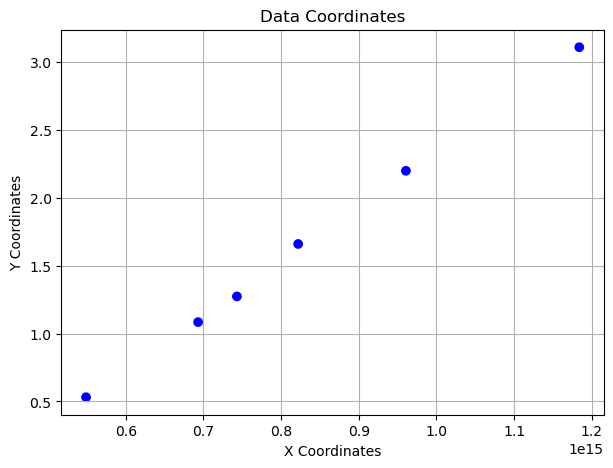

In [43]:
# code
import matplotlib.pyplot as plt

#empty arrays to store data from millikan file
x_values = []
y_values = []

#read in file 
data = open("millikan.txt", 'r')

#convert file lines to data stored in arrays defined above 
for line in data:
    line = line.strip()
    columns = line.split()
    x = float(columns[0])
    y = float(columns[1])
    x_values.append(x)
    y_values.append(y)
    print(x, y) #print statement for good measure, data looks good
    
#time to plot data, do you want a line or just the points??
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, marker='o', linestyle='', color='b')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Data Coordinates')
plt.grid(True)
plt.show()

data.close()


Calculate the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined above, and from them calculate and print out the slope $m$ and intercept $c$ of the best-fit line. Plot the line with the data.

(20 points)

E_x = 825263333333333.2
E_y = 1.6426283333333331
E_xx = 7.223504158333333e+29
E_xy = 1524407302066666.5
m = 4.088227358517502e-15
c = -1.73123580398135


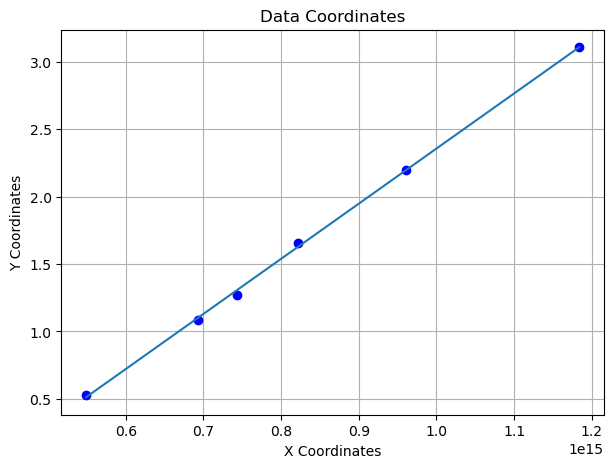

In [44]:
# code
import math
import numpy as np

#although it would be easy to just define N as 6, for good practice I used the len function to define N:
N = len(x_values)

#now to find the four E values:
E_x = (1 / N) * math.fsum(x_values)
print("E_x =", E_x)

E_y = (1 / N) * math.fsum(y_values)
print("E_y =", E_y)

#for the next one I'm going to find x squared first and then pass those through the equations

x_squared = [x**2 for x in x_values]
E_xx = (1 / N) * math.fsum(x_squared)
print("E_xx =", E_xx)

x_times_y = np.array(x_values) * np.array(y_values)
E_xy = (1 / N) * math.fsum(x_times_y)
print("E_xy =", E_xy)

#now to find m and c:

m = (E_xy - (E_x * E_y)) / (E_xx - (E_x ** 2)) 
print("m =", m)

c = ((E_xx * E_y) - (E_x * E_xy)) / (E_xx - (E_x ** 2))
print("c =", c)

y_2 = m * np.array(x_values) + c

plt.figure(figsize=(7, 5))
plt.plot(x_values, y_values, marker='o', linestyle='', color='b')
plt.plot(x_values, y_2)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Data Coordinates')
plt.grid(True)
plt.show()


The data in the file `millikan.txt` are taken from a historic
  experiment by Robert Millikan that measured the
  *photoelectric effect*.  When light of an appropriate wavelength is
  shone on the surface of a metal, the photons in the light can strike
  conduction electrons in the metal and, sometimes, eject them from the
  surface into the free space above.  The energy of an ejected electron is
  equal to the energy of the photon that struck it minus a small
  amount~$\phi$ called the **work function** of the surface,
  which represents the energy needed to remove an electron from the
  surface.  The energy of a photon is $h\nu$, where $h$ is Planck's
  constant and $\nu$ is the frequency of the light, and we can measure the
  energy of an ejected electron by measuring the voltage $V$ that is just
  sufficient to stop the electron moving.  Then the voltage, frequency, and
  work function are related by the equation

$$V = {h\over e}\nu - \phi,$$

where $e$ is the charge on the electron.  This equation was first given by
Albert Einstein in 1905.

The data in the file `millikan.txt` represent frequencies $\nu$ in
hertz (first column) and voltages $V$ in volts (second column) from
photoelectric measurements of this kind.  Using the equation above and the
program you wrote, and given that the charge on the electron is
$1.602\times10^{-19}\,$C, calculate from Millikan's experimental data a
value for Planck's constant.  Compare your value with the accepted value of
the constant, which you can find in books or on-line.  You should get a
result within a couple of percent of the accepted value.

(5 points)

This calculation is essentially the same as the one that Millikan himself
used to determine of the value of Planck's constant, although, lacking a
computer, he fitted his straight line to the data by eye.  In part for this
work, Millikan was awarded the Nobel prize in physics in 1923.

This cell is already set to markdown format. Use markdown format to express your answer.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Empty arrays to store data from millikan file
x_values = []
y_values = []

# Read in file
with open("millikan.txt", 'r') as data:
    # Convert file lines to data stored in arrays defined above
    for line in data:
        line = line.strip()
        columns = line.split()
        x = float(columns[0])  # Frequency
        y = float(columns[1])  # Voltage
        x_values.append(x)
        y_values.append(y)
#       print(x, y)  # Print statement for verification

# Define constants 
frequencies = x_values
voltages = y_values 
charge_e = 1.602e-19

# Calculate the slope (h/e) using two points
freq1, freq2 = frequencies[0], frequencies[-1]
V1, V2 = voltages[0], voltages[-1]

# Slope (h/e) = (V2 - V1) / (freq2 - freq1)
slope = (V2 - V1) / (freq2 - freq1)

# Calculate Planck's constant (h)
h = slope * charge_e

# Print the result
print(f"Calculated Planck's constant (h): {h}")

Calculated Planck's constant (h): 6.50123102351793e-34


The accepted value for Planck's Constant is 6.626 x 10^-34 and the value I found is 6.501 x 10^-34. The percent difference is 1.89% which is within the range that I was hoping for!